https://github.com/KacperBudnik/AiSD

# Zad 1

In [201]:
import types

# Z wykładu
class BinaryTree:
    def __init__(self,*items):
        if len(items)==0:
            raise ValueError("Drzewko potrzebuje korzenia!")
            
        if type(items[0]) in (list, tuple): # jeśli podany jest kontener to wykonuje dla każdego elementu z osobna
            temp=BinaryTree(items[0][0])
            self.key=temp.key
            self.right=temp.right
            self.left=temp.left
            self.add(items[0][1:])
            
        elif type(items[0]) in (set, dict):
            item=list(items[0])
            temp=BinaryTree(item[0])
            self.key=temp.key
            self.right=temp.right
            self.left=temp.left
            self.add(item[1:])
            
        elif type(items[0])==types.GeneratorType: # zadawanie przy użyciu generatora
            for item in items[0]:
                temp=BinaryTree(item)
                break
            self.key=temp.key
            self.left=temp.left
            self.right=temp.right
            self.add(items[0])
            
        elif type(items[0]) == range: # zadawanie przy użyciu range
            if len(items[0])>0: # na wypadek przykładowo range(0), brak elementu zerowego
                self.key=items[0][0]
                self.right=None
                self.left=None
                for i in items[0][1:]:
                    self.add(i)
                    
        elif type(items[0]) == BinaryTree: # Bo dlaczego nie
            self.key=items[0].key
            self.right=None
            self.left=None
            
            if items[0].right!=None:
                self.right=items[0].right.copy()
            if items[0].left!=None:
                self.left=items[0].left.copy()
        
        else:
            self.key = items[0]
            self.left = None
            self.right = None
        self.add(items[1:])
        
        
        
    def __insertLeft(self,newNode):
        if self.left == None:
            self.left = BinaryTree(newNode)
        else:
            temp = BinaryTree(newNode)
            temp.left = self.left
            self.left = temp
            
    def __insertRight(self,newNode):
        if self.right == None:
            self.right = BinaryTree(newNode)
        else:
            temp = BinaryTree(newNode)
            temp.right = self.right
            self.right = temp     
            
    def __getRightChild(self):
        return self.right

    def __getLeftChild(self):
        return self.left

    def __setRootVal(self,obj):
        self.key = obj

    def getRootVal(self):
        return self.key    
    
############ Własne ##############
    
    def __repr__(self): # jakaś prezentacja wyników
        return str(self.key)+"->"+str([self.left,self.right])
                
    def add(self, *items):
        for item in items:
            if type(item) in (list, tuple,set,dict): # jeśli podany jest kontener to wykonuje dla każdego elementu z osobna
                self.add(*item) # dla słownika dodaję kluczę
                
            elif type(item) in (types.GeneratorType, range): # generatory lub range(x)
                for i in item:
                    self.add(i)
            
            elif type(item) == BinaryTree: # Bo dlaczego nie
                i=item.key
                temp=self
                while True: # wstawia całe drzewko w miejsce, gdzie powinien się znaleźć klucz dodany do drzewa
                    if temp.key<i:
                        if temp.left==None:
                            temp.left=item.copy()
                            break
                        else:
                            temp=temp.left
                    else:
                        if temp.right==None:
                            temp.right=item.copy()
                            break
                        else:
                            temp=temp.right        
            
            else:
                if item < self.key: # równe na prawo (jako większe)
                    if self.left == None:
                        self.left = BinaryTree(item)
                    else:
                        self.left.add(item)
                else:
                    if self.right == None:
                        self.right = BinaryTree(item)
                    else:
                        self.right.add(item)
    
    def __add__(self, item):
        temp=self.copy()
        temp.add(item)
        return temp
    
    def __sub__(self,item):
        return self+(-item)
    
    def copy(self):
        temp=BinaryTree(self.key)
        if self.left!=None:
            temp.left=self.left.copy()
            
        if self.right!=None:
            temp.right=self.right.copy()

        return temp
    
    def __contains__(self, item):
        if self.key < item:
            if self.right != None:
                return item in self.right
            else:
                return False
        elif self.key > item:
            if self.left != None:
                return item in self.left
            else:
                return False
        return True
    
    def __len__(self):
        return 1 + len(self.right if self.right != None else []) + len(self.left if self.left != None else [])
    
    def find_min(self): # zwraca najmniejszy
        if self.left != None:
            return self.left.find_min()
        elif self.right != None:
            return self.right.find_min()
        return self.key
    
    def find_max(self): # zwraca największy
        if self.right != None:
            return self.right.find_max()
        elif self.left != None:
            return self.left.find_max()
        return self.key
    
    def to_list(self): # zwraca _Posortowaną_ listę elementów
        lst=[]
        
        if self.left!= None:
            lst.extend(self.left.to_list())
            
        lst.append(self.key)
        
        if self.right!= None:
            lst.extend(self.right.to_list())
            
        return lst
    
    def __iter__(self):
        return BinaryTreeIterator(self)
    
    
class BinaryTreeIterator: # Do iterowania zadanego drzewa
    def __init__(self, tree:BinaryTree):
        self.val=tree.to_list()
        self.index=-1
        self.max=len(self.val)
        
    def __next__(self):
        self.index+=1
        if self.index<self.max:
            return self.val[self.index]
        raise StopIteration

In [741]:
a = BinaryTree([[23,-15]])

In [721]:
a

23->[-15->[None, None], None]

In [722]:
a = BinaryTree([{0,-1,32,2},{100},23,23],1,2,-2,[23],{-50})

In [723]:
a

0->[-1->[-2->[-50->[None, None], None], None], 32->[2->[1->[None, None], 23->[2->[None, None], 23->[None, 23->[None, None]]]], 100->[None, None]]]

In [700]:
a=BinaryTree([[([{0,0,0,0,0},23],3),5,6,7,8],-12,3,4,5],20,{2,3,4})

In [701]:
a

0->[-12->[None, None], 23->[3->[2->[None, None], 5->[3->[None, 4->[3->[None, None], 4->[None, None]]], 6->[5->[None, None], 7->[None, 8->[None, 20->[None, None]]]]]], None]]

In [647]:
a=BinaryTree(1,2)

In [648]:
a

1->[None, 2->[None, None]]

In [649]:
a.add(-12)

In [650]:
a

1->[-12->[None, None], 2->[None, None]]

In [651]:
a=BinaryTree(1,2)

In [652]:
print(a+0)

1->[0->[None, None], 2->[None, None]]


In [653]:
a

1->[None, 2->[None, None]]

In [654]:
b=a+0

In [655]:
b

1->[0->[None, None], 2->[None, None]]

In [656]:
a

1->[None, 2->[None, None]]

In [657]:
b-=3

In [658]:
b

1->[0->[-3->[None, None], None], 2->[None, None]]

In [659]:
a

1->[None, 2->[None, None]]

In [660]:
1 in a

True

In [661]:
12 in a

False

In [662]:
len(a)

2

In [663]:
len(b)

4

In [664]:
b

1->[0->[-3->[None, None], None], 2->[None, None]]

In [665]:
len(b+2+3)

6

In [666]:
b.find_min()

-3

In [667]:
b.find_max()

2

In [668]:
(b+12).find_max()

12

In [669]:
(b-12).find_min()

-12

In [763]:
b=BinaryTree(1,2,23,23,2,31,3,12,3,123,3)

In [764]:
b+=[1,2,3,-5,23,-54,-1.2,32,4,4,7,7,6,5,4,3,-123,3-4,-34,2-2,4-5,5,-5,-3-23,-5]

In [765]:
b

1->[-5->[-54->[-123->[None, None], -34->[None, -26->[None, None]]], -1.2->[-5->[None, -5->[None, None]], -1->[None, 0->[-1->[None, None], None]]]], 2->[1->[None, None], 23->[2->[None, 3->[2->[None, None], 12->[3->[None, 3->[None, 3->[None, 4->[3->[None, None], 4->[None, 7->[6->[5->[4->[None, None], 5->[None, None]], None], 7->[None, None]]]]]]], None]]], 23->[None, 31->[23->[None, None], 123->[32->[None, None], None]]]]]]

In [766]:
b.to_list()

[-123,
 -54,
 -34,
 -26,
 -5,
 -5,
 -5,
 -1.2,
 -1,
 -1,
 0,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 6,
 7,
 7,
 12,
 23,
 23,
 23,
 31,
 32,
 123]

In [767]:
len(b)

36

In [768]:
len(b.to_list())

36

In [769]:
all(b.to_list()[i] in b for i in range(len(b)))

True

In [770]:
for i in b:
    print(i)

-123
-54
-34
-26
-5
-5
-5
-1.2
-1
-1
0
1
1
2
2
2
3
3
3
3
3
4
4
4
5
5
6
7
7
12
23
23
23
31
32
123


In [771]:
all(i in b.to_list() for i in b)

True

In [86]:
from random import randint
a = BinaryTree(randint(-50,50) for i in range(50))

In [87]:
a

20->[-50->[None, -2->[-31->[-40->[-46->[None, -44->[-45->[None, None], -42->[-43->[None, None], None]]], -36->[None, -32->[-34->[-36->[None, -35->[None, None]], None], -32->[None, -32->[None, None]]]]], -26->[-30->[-31->[None, None], None], -23->[None, -5->[-6->[-13->[-20->[None, None], -12->[None, -7->[None, None]]], -6->[None, None]], None]]]], 9->[5->[-1->[None, None], None], 11->[10->[None, None], 18->[12->[None, None], None]]]]], 49->[36->[20->[None, 30->[22->[None, 23->[22->[None, 22->[None, None]], 27->[None, None]]], 35->[31->[None, None], None]]], 46->[45->[None, None], 47->[None, 48->[None, None]]]], None]]

In [226]:
a = BinaryTree([12,3],( -i**2 for i in range(3)), [range(15)])

In [227]:
a

12->[3->[0->[-1->[-4->[None, None], None], 0->[None, 1->[None, 2->[None, None]]]], 3->[None, 4->[None, 5->[None, 6->[None, 7->[None, 8->[None, 9->[None, 10->[None, 11->[None, None]]]]]]]]]], 12->[None, 13->[None, 14->[None, None]]]]

In [228]:
a = BinaryTree(range(124))

In [229]:
a

0->[None, 1->[None, 2->[None, 3->[None, 4->[None, 5->[None, 6->[None, 7->[None, 8->[None, 9->[None, 10->[None, 11->[None, 12->[None, 13->[None, 14->[None, 15->[None, 16->[None, 17->[None, 18->[None, 19->[None, 20->[None, 21->[None, 22->[None, 23->[None, 24->[None, 25->[None, 26->[None, 27->[None, 28->[None, 29->[None, 30->[None, 31->[None, 32->[None, 33->[None, 34->[None, 35->[None, 36->[None, 37->[None, 38->[None, 39->[None, 40->[None, 41->[None, 42->[None, 43->[None, 44->[None, 45->[None, 46->[None, 47->[None, 48->[None, 49->[None, 50->[None, 51->[None, 52->[None, 53->[None, 54->[None, 55->[None, 56->[None, 57->[None, 58->[None, 59->[None, 60->[None, 61->[None, 62->[None, 63->[None, 64->[None, 65->[None, 66->[None, 67->[None, 68->[None, 69->[None, 70->[None, 71->[None, 72->[None, 73->[None, 74->[None, 75->[None, 76->[None, 77->[None, 78->[None, 79->[None, 80->[None, 81->[None, 82->[None, 83->[None, 84->[None, 85->[None, 86->[None, 87->[None, 88->[None, 89->[None, 90->[None, 91->[None

In [231]:
a=BinaryTree(1,2,-3)

In [232]:
a

1->[-3->[None, None], 2->[None, None]]

In [233]:
b=BinaryTree(a)

In [234]:
b

1->[-3->[None, None], 2->[None, None]]

In [237]:
b=BinaryTree(a for i in [1,1,1]) # 3 razy a

In [238]:
b

1->[-3->[None, None], 2->[None, 1->[-3->[None, None], 2->[None, 1->[-3->[None, None], 2->[None, None]]]]]]

# Zadanie 2

In [22]:
import types
import numpy as np
# Z wykładu zmienione

class BinHeap:
    def __init__(self,*items): # skrócenie nazw + możliwość podania elementów kopca przy dodawaniu
        self.list = [0]
        self.size = 0
        self.add(*items)
        
    def percUp(self,i):
        while i // 2 > 0:
            if self.list[i] < self.list[i // 2]:
                tmp = self.list[i // 2]
                self.list[i // 2] = self.list[i]
                self.list[i] = tmp
            i = i // 2      
        
    def insert(self,k):
        self.list.append(k)
        self.size = self.size + 1
        self.percUp(self.size)        
        
    def findMin(self):
        if self.size==0:
            raise IndexError("Kopiec jest pusty")
        return self.list[1]

    def percDown(self,i):
        while (i * 2) <= self.size:
            mc = self.minChild(i)
            if self.list[i] > self.list[mc]:
                tmp = self.list[i]
                self.list[i] = self.list[mc]
                self.list[mc] = tmp
            i = mc

    def minChild(self,i):
        if i * 2 + 1 > self.size:
            return i * 2
        else:
            if self.list[i*2] < self.list[i*2+1]:
                return i * 2
            else:
                return i * 2 + 1    
            
    def delMin(self):
        if self.size==0:
            raise IndexError("Kopiec jest pusty")
        retval = self.list[1]
        self.list[1] = self.list[self.size]
        self.size = self.size - 1
        self.list.pop()
        self.percDown(1)
        return retval           
    
    def buildHeap(self,alist): # już nie potrzebne (jest to _clear i dodanie po prostu listy)
        i = len(alist) // 2
        self.size = len(alist)
        self.list = [0] + alist[:]
        while (i > 0):
            self.percDown(i)
            i = i - 1    
            
    def size(self):
        return self.size
    
    def isEmpty(self):
        return self.size == 0
    
    def __str__(self):
        txt = "{}".format(self.list[1:])
        return txt
    
##################################################################
#                             Własne                             #
##################################################################

    def __repr__(self):
        return str(self.list[1:])
    
    def __len__(self):
        return self.size
    
    def add(self,*items): # by było można podawać wiele argumentów, wraz z kontenerami
        for item in items:
            if type(item) in (tuple, list):
                self.add(*item)
            elif type(item) in (dict, set):
                self.add(*list(item))
            elif type(item) == types.GeneratorType:
                for i in item:
                    self.add(i)
            elif isinstance(item, np.ndarray):
                item=list(item)
                self.add(item)
            else:
                self.insert(item)

    def _clear(self): # czyszczenie kopca (prywatna, by nie użyć przez przypadek)
        self.list=[0]
        self.size=0
        
    """ #Nie działa dla list wielkości >> 2**12
    def sort(self):
        if self.size>0:
            sortedList=[self.findMin()]
            self.delMin()
            self.sort()
            self.list=[0]+sortedList+self.list[1:]
        else:
            #print("Hakunamatata")
            pass"""
    
    def sort(self):
        sortedList=[]
        s=self.size
        while self.size>0:
            sortedList.append(self.delMin())
        self.list=[0]+sortedList
        self.size=s

In [23]:
from random import randint
a=BinHeap(randint(-50,50) for i in range(31))

In [24]:
a

[-50, -39, -44, -37, -39, -43, -37, -19, -30, -8, -37, -6, -41, 19, -22, 44, 0, 38, -15, 45, 9, 14, -3, 43, 17, 13, -40, 40, 27, 34, 20]

In [29]:
a.sort()

In [30]:
a

[-50, -44, -43, -41, -40, -39, -39, -37, -37, -37, -30, -22, -19, -15, -8, -6, -3, 0, 9, 13, 14, 17, 19, 20, 27, 34, 38, 40, 43, 44, 45]

In [31]:
import sys
recursionlimit=sys.getrecursionlimit()
print(recursionlimit)

3000


In [4]:
sys.setrecursionlimit(3000)

In [36]:
import time
import numpy as np

n=20
times=np.zeros(n+1)
numbers=np.random.randint(-2**n,2**n,2**n)

for i in range(n+1):
    a=BinHeap(numbers[:2**i])
    T=time.time()
    a.sort()
    times[i]=time.time()-T


In [37]:
times

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.99689102e-04, 0.00000000e+00, 1.00159645e-03,
       2.00057030e-03, 2.99811363e-03, 6.50477409e-03, 1.50029659e-02,
       3.20076942e-02, 7.20188618e-02, 1.61966085e-01, 3.50565195e-01,
       7.49270439e-01, 1.66262412e+00, 3.62837553e+00, 7.87286735e+00,
       1.70448165e+01])

In [38]:
import matplotlib.pyplot as plt

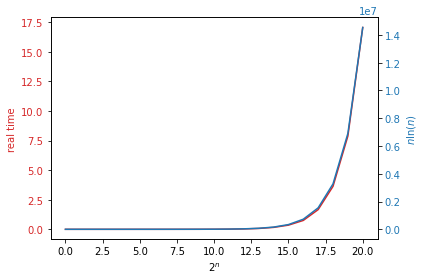

In [47]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('$2^n$')
ax1.set_ylabel('real time', color=color)
ax1.plot(range(n+1), times, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$n\ln(n)$', color=color)  # we already handled the x-label with ax1
ax2.plot(range(n+1), [2**i*np.log(2**i) for i in range(n+1)], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

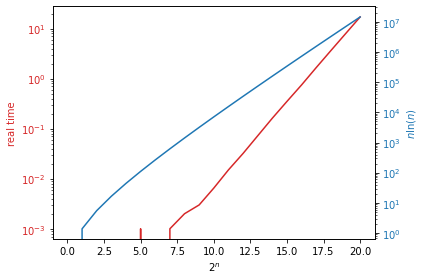

In [48]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('$2^n$')
ax1.set_ylabel('real time', color=color)
ax1.plot(range(n+1), times, color=color)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.yscale('log')
ax1.set_yscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$n\ln(n)$', color=color)  # we already handled the x-label with ax1
ax2.plot(range(n+1), [2**i*np.log(2**i) for i in range(n+1)], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Zadanie 4

Usuń `_ _` i daj jedno `_` chyba w każdym zadaniu

In [17]:
import numpy as np

class MathTree:
    def __init__(self,L_number,operator,R_number):
        self.key=operator
        self.right=None
        self.left=None
        
        if R_number:
            if R_number[1]==True:
                self.right=R_number
            elif R_number[1]==False:
                self.right=MathTree(self.cos(R_number[0])) 
        if L_number:
            if L_number[1]==True:
                self.left=L_number
            elif R_number[1]==False:
                self.left=MathTree(self.cos(L_number[0])) 
        
    def cos(txt):
        
        order=np.array([
            ["+","-"],
            ["*","/"], # nie ma różnicy między `/`, oraz `\` są dzieleniem prawostronnym
            ["^"]])
        
        function=np.array([
            ["sqrt","log_","log","ln","pow","exp","log2"],
            ["sin","cos","tan","cot","sec","cosec"]
            ["arcsin","arccos","asin","acos","arctan","atan","acot","arccot"],
            ["sinh","cosh","tanh","coth","sech","cosech"]#,
            #["'"]
        ])
        
        i=0
        l=len(txt)
        
        first=""
        secound=""
        operator_level=-5
        operator_place=-2
        
        while i < l:
            if txt[i]=="(":
                j=1
                parenthesis=0
                while True: # założyłem, że nawiasy są poprawnie wstawione
                    if txt[i+j]==")":
                        if parenthesis==0:
                            if first:
                                pass
                            else:
                                first=txt[i+1:i+j]
                                
            elif txt[i] in order[0]: # Dodawanie/odejmowanie
            
                return [txt[0:i], False], txt[i], [txt[i+1:], False]

            elif txt[i] in order[1]: #Mnożeni/dzielenie
                if operator_level<0:
                    operator_level=1
                    operator_place=i
                else:
                    if operator_level>1:
                        return [txt[0:i], False], txt[i], [txt[i+1:], False]
                    else:
                        return [txt[0:operator_place], False], txt[operator_place], [txt[operator_place+1:], False]
            
            elif txt[i] == order[2]:
                if operator_level<0:
                    operator_level=2
                    operator_place=i
                else:
                    if operator_level>1:
                        return [txt[0:i], False], txt[i], [txt[i+1:], False]
                    else:
                        return [txt[0:operator_place], False], txt[operator_place], [txt[operator_place+1:], False]
                    
        
        
        while i<l:
            if txt[i].isnumeric():
                j=1
                while i+j<l and txt[i:i+j+1].isnumeric():
                    j+=1
                
                numbers.append(float(txt[i:i+j]))
            elif txt[i] in order[0]:
                operators.append(txt[i])
                action=True
                
            elif txt[i] in order[1]:
                operators.append(txt[i])
                action=True
            
            elif txt[i] in order[2] or txt[i:i+2] in order[2]:
                operators.append("^")
                action=True
            



In [61]:
def derivate(txt):
    txt=txt.replace(" ", "")
    txt=txt.replace("**", "^")
    txt=txt.replace("\\", "/")
    txt=txt.replace(":", "/")
    txt=txt.replace("arc", "a")
    
    tree=MathTree([txt,False],"=",[None,None])

In [ ]:
any(a in i for i in function)

In [67]:
import numpy as np

class MathTree:
    def __init__(self,L_number,operator,R_number):
        self.key=operator
        self.right=None
        self.left=None
        
        if type(L_number) is MathTree:
            self.left=L_umber
        if type(R_number) is MathTree:
            self.right=R_umber
            
        
        if R_number != None:
            if R_number.isnumeric():
                self.right=R_number
            else:
                self.right=self.cos(R_number)
                
        if L_number != None:
            if L_number.isnumeric():
                self.left=L_number
            else:
                self.left=self.cos(L_number) 
        
    def cos(txt):
        
        order=np.array([
            ["+","-"],
            ["*","/"],
            ["^"]])
        
        function=np.array([
            ["sqrt","log_","log","ln","pow","exp","log2"],
            ["sin","cos","tan","cot","sec","cosec"]
            ["asin","acos","atan","acot"],
            ["sinh","cosh","tanh","coth","sech","cosech"]#,
            #["'"]
        ])
        
        
        
        function=np.array([
            []
            ["ln"],
            ["log","pow","exp","sin","cos","tan","cot","sec"],
            ["sqrt","log2","asin","acos","atan","acot","sinh","cosh","tanh","coth","sech"],
            ["log10"],
            ["cosech"]
        ])
        
        tree=[]
        first=[]
        
        i=0
        l=len(txt)
        
        while i<l:
            if txt[i:i+6] in function[6]:
                j=i+6
                if txt[j]=="(":
                    parenthesis=0
                    while True:
                        if txt[j]=="(":
                            parenthesis+=1
                        elif txt[j]==")":
                            parenthesis-=1
                        if parenthesis==0:
                            break
                        j+=1
                    first=(MathTree(txt[i+6+1:j], txt[i:i+6], None))
                else:
                    raise InputError("Podano niedobre wyrażenie")
                i=j+2
                if txt[i] in order[0]:
                    return MathTree(first,txt[i],txt[i+1:])
                elif txt[i] in order[1]:
                    return order1(first,txt[i],txt[i+1:])
                elif txt[i] == "^":
                    return order2(first,txt[i],txt[i+1:])
                
            elif txt[i:i+5] in function[5]:
                pass
            elif txt[i:i+4] in function[4]:
                pass
            elif txt[i:i+3] in function[3]:
                pass
            elif txt[i:i+2] in function[2]:
                pass
        
        first=""
        secound=""
        operator_level=-5
        operator_place=-2
        
        while i < l:
            if txt[i]=="(":
                j=1
                parenthesis=0
                while True: # założyłem, że nawiasy są poprawnie wstawione
                    if txt[i+j]==")":
                        if parenthesis==0:
                            if first:
                                pass
                            else:
                                first=txt[i+1:i+j]
                                
            elif txt[i] in order[0]: # Dodawanie/odejmowanie




IndentationError: expected an indented block (<ipython-input-67-12a4390f0aa6>, line 76)

In [70]:
    def order1(Tree,op,txt):
        
        order=np.array([
            ["+","-"],
            ["*","/"],
            ["^"]])
        
        
        function=np.array([
            []
            ["ln"],
            ["log","pow","exp","sin","cos","tan","cot","sec"],
            ["sqrt","log2","asin","acos","atan","acot","sinh","cosh","tanh","coth","sech"],
            ["log10"],
            ["cosech"]
        ])
        
        
        i=0
        l=len(txt)
        
        while i<l:
            if txt[i] in order[0]:
                return MathTree(txt[:i],txt[i],txt[i+1:])
            elif txt[i] in order[1]:
                return MathTree(txt[:i],txt[i],order1()



<>:10: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:19: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:10: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:19: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<ipython-input-70-8f434689b720>:10: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  ["sin","cos","tan","cot","sec","cosec"]
<ipython-input-70-8f434689b720>:19: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  []


In [75]:
(1,) in (1,2)

False

In [79]:
def derivate(txt):
    txt=txt.replace(" ", "")
    txt=txt.replace("**", "^")
    txt=txt.replace("\\", "/")
    txt=txt.replace(":", "/")
    txt=txt.replace("arc", "a")
    
    txt=prepare([txt],"(")
    
    
    tree=MathTree([txt,False],"=",[None,None])

In [200]:
#def Tree:
    
#    def __init__(self,txt):
 
def prepare(txts):
    function=np.array([
        [],
        [],
        ["ln"],
        ["log","pow","exp","sin","cos","tan","cot","sec"],
        ["sqrt","log2","asin","acos","atan","acot","sinh","cosh","tanh","coth","sech"],
        ["log10"],
        ["cosech"]
    ])

    operators=["+","-","*","/","^"]

    unknown=False
    res=[]
    for txt in txts:
        l=len(txt)
        i=0
        while i<l:
            if txt[i]=="(":
                par=0
                j=i
                while True:
                    if txt[j]=="(":
                        par+=1
                        
                    if txt[j]==")":
                        par-=1
                        #print(-1)
                        
                    if par==0:
                        break
                    j+=1
                res.append(prepare(txt[i+1:j]))
                i=j
                
                
            elif txt[i:i+6] in function[6]:
                #res.append(txt[i:i+6])
                j=i+6
                if txt[j]=="(":
                    par=0
                    while True:
                        if txt[j]=="(":
                            par+=1

                        if txt[j]==")":
                            par-=1

                        if par==0:
                            break
                        j+=1
                    res.append([txt[i:i+6],prepare(txt[i+1:j])])
                    i=j
                else:
                    res.append([txt[i:i+6],txt[i+6]])
                i+=6
                
                
            elif txt[i:i+5] in function[5]:
                #res.append(txt[i:i+5])
                j=i+5
                if txt[j]=="(":
                    par=0
                    while True:
                        if txt[j]=="(":
                            par+=1

                        if txt[j]==")":
                            par-=1

                        if par==0:
                            break
                        j+=1
                    res.append([txt[i:i+5],prepare(txt[i+1:j])])
                    i=j
                else:
                    res.append([txt[i:i+5],txt[i+5]])
                i+=5
                
                
            elif txt[i:i+4] in function[4]:
                #res.append(txt[i:i+4])
                j=i+4
                if txt[j]=="(":
                    par=0
                    while True:
                        if txt[j]=="(":
                            par+=1

                        if txt[j]==")":
                            par-=1

                        j+=1
                        if par==0:
                            break
                    print(txt[i+4:j])
                    res.append([txt[i:i+4],prepare([txt[i+4:j]])])
                    i=j
                else:
                    res.append([txt[i:i+4],txt[i+4]])
                i+=4
                
                
            elif txt[i:i+3] in function[3]:
                #res.append(txt[i:i+3])
                j=i+3
                if txt[j]=="(":
                    par=0
                    while True:
                        if txt[j]=="(":
                            par+=1

                        if txt[j]==")":
                            par-=1

                        if par==0:
                            break
                        j+=1
                    res.append([txt[i:i+3],prepare([txt[i+1:j]])])
                    i=j
                else:
                    res.append([txt[i:i+3],txt[i+3]])
                i+=3
                
                
            elif txt[i:i+2] in function[2]:
                #res.append(txt[i:i+2])
                j=i+2
                if txt[j]=="(":
                    par=0
                    while True:
                        if txt[j]=="(":
                            par+=1

                        if txt[j]==")":
                            par-=1

                        if par==0:
                            break
                        j+=1
                    res.append([txt[i:i+2],prepare(txt[i+1:j])])
                    i=j
                else:
                    res.append([txt[i:i+2],txt[i+2]])
                i+=2
                
                
            elif txt[i] in operators:
                res.append(txt[i])
            else:
                unnown=False
                if txt[i].isnumeric():
                    j=1
                    while txt[i:i+j+1].isnumeric() and j<l:
                        j+=1
                    if unknown:
                        pass
                        #res.append("*")
                    else:
                        unknown=True
                    res.append(txt[i:j])
                    i+=j-1
                else:
                    res.append(txt[i])



            i+=1    
    return res

In [203]:
txt="(tanh(5-3))"

In [204]:
prepare([txt])

<ipython-input-200-ab72b5933650>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function=np.array([


IndexError: string index out of range

In [88]:
a+=b-1

In [89]:
a

2

# Zad 4 dobre

In [232]:
class MathTree:
    
    def __init__(self, equation):
        #print(len(equation))
        self.key=None
        self.left=None
        self.right=None
        if len(equation)==1:
            self.key=equation[0]
            
        if len(equation)==2:
            self.key=equation[0]
            while type(equation[1]) is list and len(equation[1]) == 1:
                equation[1]=equation[1][0]
            self.left=MathTree(equation[1])
            
        if len(equation)==3:
            self.key=equation[1]
            self.left=MathTree(equation[0])
            self.right=MathTree(equation[2])

In [227]:
def derivate(txt):
    txt=txt.replace(" ", "")
    txt=txt.replace("**", "^")
    txt=txt.replace("\\", "/")
    txt=txt.replace(":", "/")
    txt=txt.replace("arc", "a")
    
    tree=MathTree(*prepare(txt))
    return tree


def prepare(txt):
    function=np.array([
        [],
        [],
        ["ln"],
        ["log","pow","exp","sin","cos","tan","cot","sec"],
        ["sqrt","log2","asin","acos","atan","acot","sinh","cosh","tanh","coth","sech"],
        ["log10"],
        ["cosech"]
    ])

    operators=["+","-","*","/","^"]#,"'"]

    unknown=False
    res=[]
    l=len(txt)
    i=0
    while i<l:
        if txt[i]=="(":
            par=0
            j=i
            while True:
                if txt[j]=="(":
                    par+=1

                if txt[j]==")":
                    par-=1

                if par==0:
                    break
                j+=1
            res.append(prepare(txt[i+1:j]))
            i=j
            unnown=True


        elif txt[i:i+6] in function[6]:
            j=i+6
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+6],prepare(txt[i+6+1:j])])
                i=j
            else:
                res.append([txt[i:i+6],txt[i+6]])
            i+=6
            unnown=True


        elif txt[i:i+5] in function[5]:
            #res.append(txt[i:i+5])
            j=i+5
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+5],prepare(txt[i+5+1:j])])
                i=j
            else:
                res.append([txt[i:i+5],txt[i+5]])
            i+=5
            unnown=True


        elif txt[i:i+4] in function[4]:
            j=i+4
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+4],prepare(txt[i+4+1:j])])
                i=j
            else:
                res.append([txt[i:i+4],txt[i+4]])
            i+=4
            unnown=True

#########
        elif txt[i:i+3] in function[3]:
            #res.append(txt[i:i+3])
            j=i+3
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+3],prepare(txt[i+3+1:j])])
                i=j
            else:
                res.append([txt[i:i+3],txt[i+3]])
            i+=3
            unnown=True

##########
        elif txt[i:i+2] in function[2]:
            #res.append(txt[i:i+2])
            j=i+2
            if txt[j]=="(":
                par=0
                while True:
                    if txt[j]=="(":
                        par+=1

                    if txt[j]==")":
                        par-=1

                    if par==0:
                        break
                    j+=1
                res.append([txt[i:i+2],prepare(txt[i+2+1:j])])
                i=j
            else:
                res.append([txt[i:i+2],txt[i+2]])
            i+=2
            unnown=True


        elif txt[i] in operators:
            res.append(txt[i])
            unknown=False
            
        else:
            if txt[i].isnumeric():
                j=1
                while txt[i:i+j+1].isnumeric() and j<l:
                    j+=1
                if unknown:
                    pass
                    #res.append('*')
                res.append(txt[i:i+j])
                i+=j-1
            else:
                if unknown:
                    pass
                    res.append("*")
                res.append(txt[i])
            unknown=True



        i+=1    
    res=correct(res)
        
    return res

In [148]:
def correct(equation,lvl=4):
    operators=["+","-","*","/","^"]
    if operators[lvl] in ("^",):
        reverse=True
    else:
        reverse=False
    
    for i in range(len(equation))[::(-1)**reverse]:
        if equation[i] == operators[lvl]:
            return correct(equation[:i-1]+[equation[i-1:i+2]]+equation[i+2:],lvl=lvl)
        
    if lvl>0:
        return correct(equation,lvl=lvl-1)
    return equation

In [233]:
a=derivate(txt)

<ipython-input-227-3a3cc4f00204>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function=np.array([


In [230]:
prepare(txt)

<ipython-input-227-3a3cc4f00204>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  function=np.array([


[['5',
  '*',
  ['tanh',
   [[['a', '*', ['x', '^', ['2', '^', '3']]],
     '-',
     ['sin', [['2', '*', 'x']]]]]]]]

In [191]:
txt="5*tanh(ax^2^3-sin(2x))"

In [52]:
txt="tanh(5-3)"

In [181]:
txt="ax"

In [64]:
txt[::-1]

'))x2(nis-3^2^xa(hnat*5'

In [68]:
-1**False

-1

In [69]:
[2]+[3]+["cos"]

[2, 3, 'cos']